In [35]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df = pd.read_csv("bol_sales.csv")
df = df.dropna()
df.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol
0,person_1,female,7065,4.6,30,105,117,1232
1,person_2,female,23028,9.8,23,81,70,1396
2,person_3,female,103377,9.2,11,38,94,1240
3,person_4,female,9815,3.2,16,54,124,720
4,person_5,female,22646,10.1,21,78,119,1379


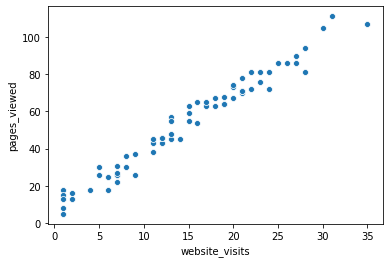

In [36]:
sns.scatterplot(x="website_visits", y="pages_viewed", data=df)
plt.show()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,income_log
0,person_1,female,7065,4.6,30,105,117,1232,3.849112
1,person_2,female,23028,9.8,23,81,70,1396,4.362256
2,person_3,female,103377,9.2,11,38,94,1240,5.014424
3,person_4,female,9815,3.2,16,54,124,720,3.991890
4,person_5,female,22646,10.1,21,78,119,1379,4.354992


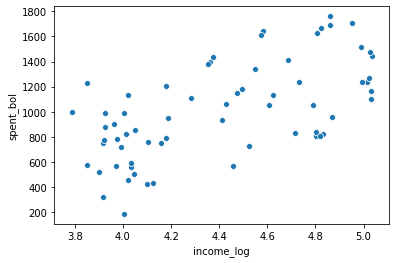

In [44]:
import math
df['income_log'] = df['income'].apply(math.log10)
sns.scatterplot(x='income_log', y = 'spent_bol', data = df)
df.head()

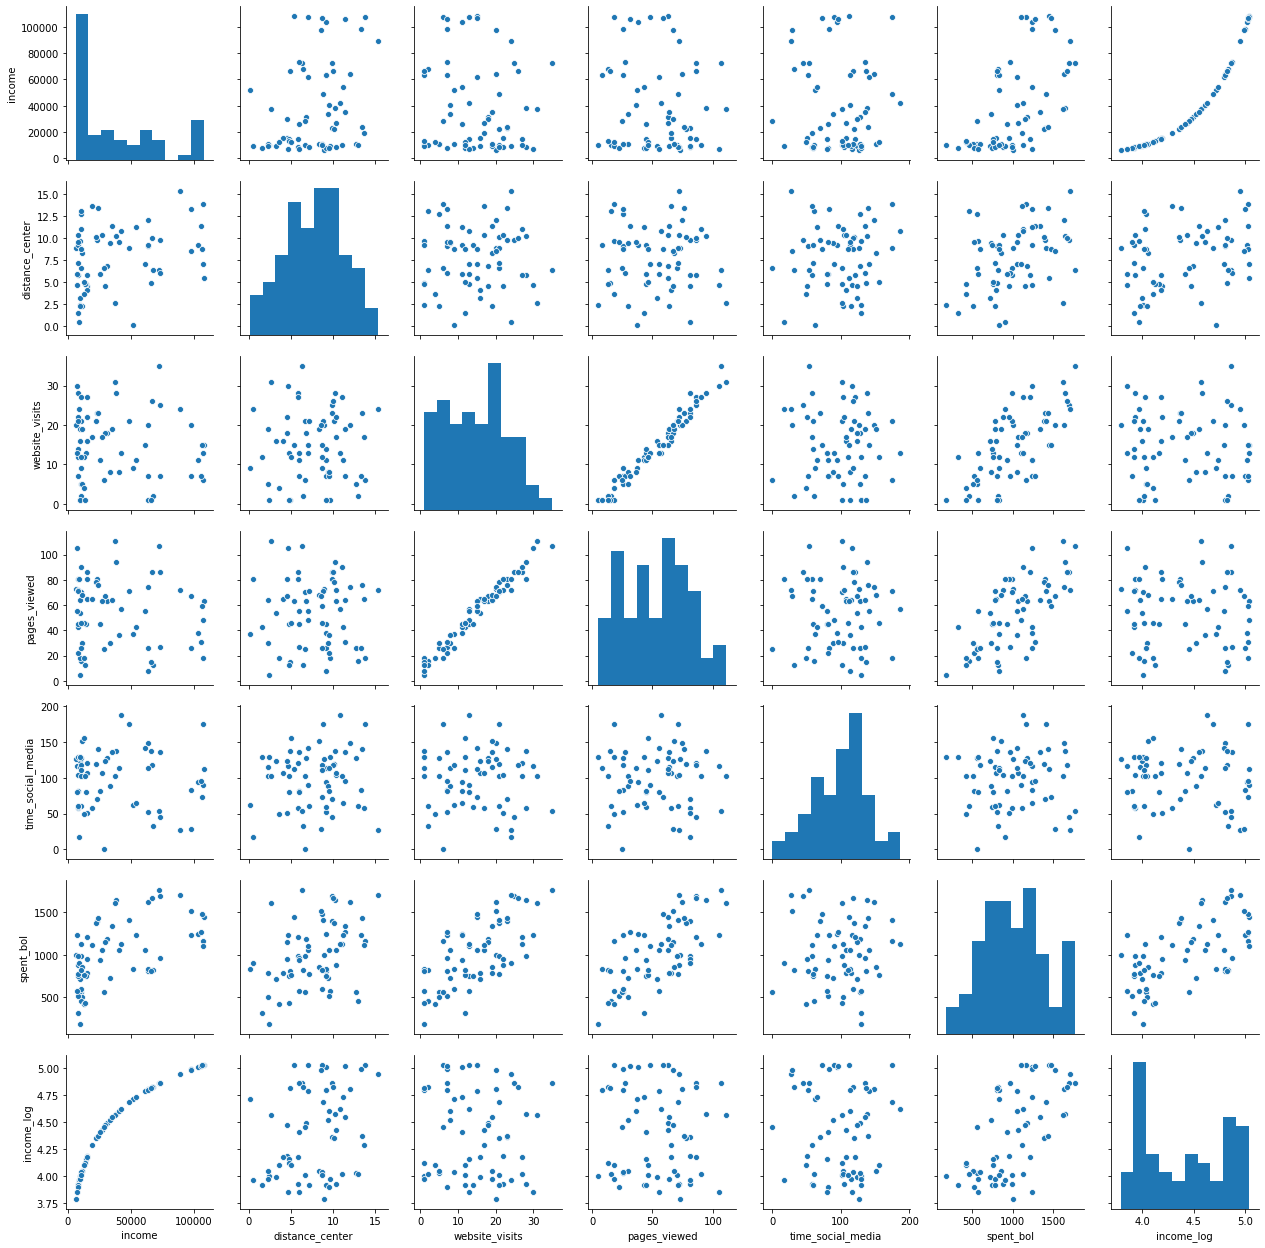

In [38]:
sns.pairplot(df)
plt.show()

In [39]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

Y = df['spent_bol'] # define the target variable (dependent variable) as y
X = df[['distance_center', 'website_visits', 'income_log']] 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) #test_size=0.3 indicates the percentage of the data that should be held over for testing

In [40]:
from sklearn.linear_model import LinearRegression
   
lm = LinearRegression(); #create the lm object
model = lm.fit(X_train, y_train); #fit the model

b0 = lm.intercept_ 
b1 = lm.coef_[0]
b2 = lm.coef_[1]
b3 = lm.coef_[2]

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X + {b2:.2f}X + {b3:.2f}X") 

The regression line is equal to y = -2126.74 + 19.01X + 32.43X + 569.09X


In [41]:
from sklearn.metrics import r2_score

y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.9180333516862328

In [43]:
import math 
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_test_p)) 

110.95044867735056

The RMSE is 110,95. Which means that we are typically about 110,95 off.